<a href="https://colab.research.google.com/github/huiesoo/esaa/blob/main/24-1/0517.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 03 케라스(Keras)

## 01 딥러닝 준비

### 1-1 주요 용어

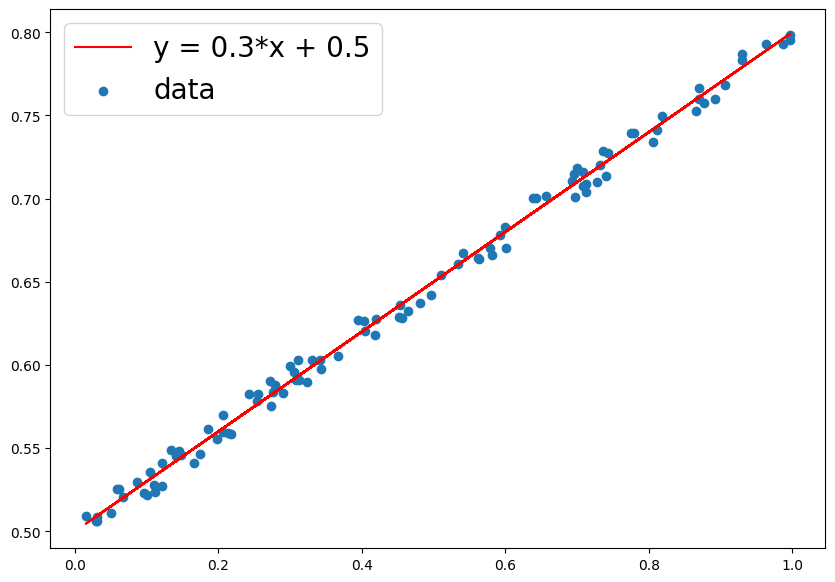

w: 0.3, b: 0.5


In [1]:
from IPython.display import YouTubeVideo, Image
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [2]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b

    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.77728, b = 0.17263 error = 4.06696
 5 w = 0.73394, b = 0.28715 error = 0.83555
10 w = 0.66659, b = 0.32083 error = 0.59618
15 w = 0.60945, b = 0.34871 error = 0.42564
20 w = 0.56119, b = 0.37226 error = 0.30402
25 w = 0.52044, b = 0.39214 error = 0.21730
30 w = 0.48603, b = 0.40892 error = 0.15545
35 w = 0.45696, b = 0.42310 error = 0.11135
40 w = 0.43242, b = 0.43507 error = 0.07989
45 w = 0.41170, b = 0.44518 error = 0.05746
50 w = 0.39420, b = 0.45372 error = 0.04147
55 w = 0.37942, b = 0.46093 error = 0.03006
60 w = 0.36694, b = 0.46702 error = 0.02193
65 w = 0.35640, b = 0.47216 error = 0.01613
70 w = 0.34750, b = 0.47650 error = 0.01199
75 w = 0.33998, b = 0.48017 error = 0.00904
80 w = 0.33364, b = 0.48327 error = 0.00694
85 w = 0.32828, b = 0.48588 error = 0.00544
------------------------------------------------------------
87 w = 0.3, b = 0.5 error = 0.00497


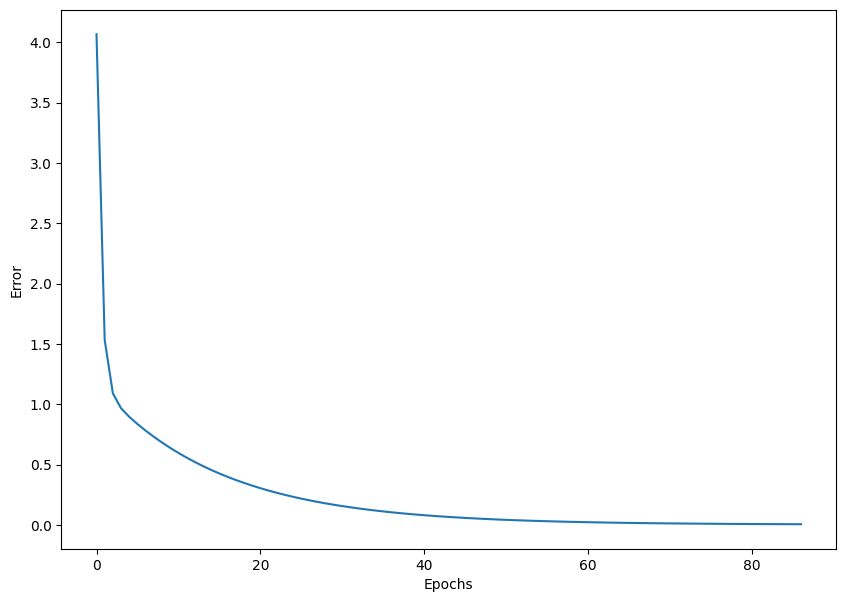

In [3]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### 1-2 딥러닝 프로세스

## 02 단순 신경망 훈련

### 2-1 선형회귀



*   회귀 분석: 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계 기법



### 2-2 뉴런(Neuron)



*   인공 신경망 모델을 구성하는 하나의 신경
*   노드(node)
*   내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치가 업데이트됨
    *   역전파(back propagation) 알고리즘: 신경망 모델의 파라미터들에 대한 그래디언트를 계산하는 방법. 역전파는 신경망을 구성하는 각 레이어와 관련된 손실함수를 미분한 결과인 그래디언트를 출력층에서 입력틍 순으로 역으로 계산하고 저장



### 2-3 Dense 레이어



*   심층 신경망 모델을 구성하는 가장 기본 레이어
*   각 레이어와 레이어 사이에 모든 뉴런이 서로 연결 -> 완전 연결층(Fully Connected Layer)



### 2-4 데이터셋 만들기

In [4]:
import numpy as np

# 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


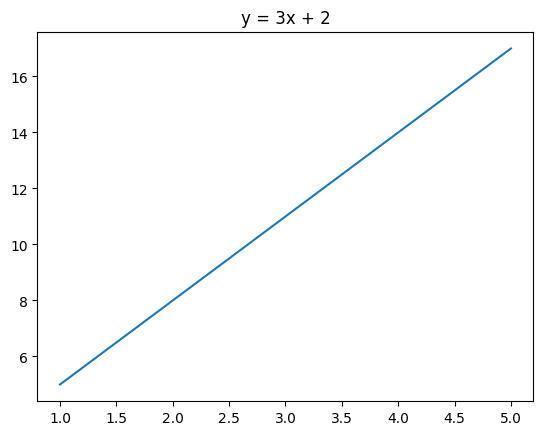

In [5]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()


### 2-5 Sequential API



*   층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결
*   입력 레이어부터 출력 레이어까지 순서



In [6]:
import tensorflow as tf

In [7]:
# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [8]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

In [9]:
import tensorflow as tf

In [20]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1),
])

In [21]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

### 2-6 모델 요약



*   모델의 구조 확인
*   층별 노드의 개수, 훈련 시 업데이트할 파라미터의 개수 표기
*   params
    *   Total: 모델 내부에 존재하는 모든 파라미터의 합계
    *   Trainable: 모델 훈련 시 업데이트할 파라미터의 총 개수
    *   Non-trainable: 훈련 시 업데이트하지 않을 파라미터의 총 개수




In [12]:
# 모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2-7 컴파일



*   모델의 훈련 과정에서 적용할 옵티마이저(optimizer), 손실함수(loss), 평가지표(metrics) 정의
*   클래스 인스턴스(하이퍼파라미터를 사용자가 직접 지정), 함수, 사전 정의된 문자열로 지정



In [22]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [23]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [24]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
                       ])

In [25]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 2-8 훈련



*   가중치(weight) 텐서 업데이트



In [26]:
# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 373ms/step - loss: 99.7301 - mae: 9.3638
Epoch 2/1200
1/1 [==============================] - 0s 12ms/step - loss: 58.2301 - mae: 7.1965
Epoch 3/1200
1/1 [==============================] - 0s 12ms/step - loss: 34.0452 - mae: 5.5418
Epoch 4/1200
1/1 [==============================] - 0s 13ms/step - loss: 19.9506 - mae: 4.2785
Epoch 5/1200
1/1 [==============================] - 0s 14ms/step - loss: 11.7363 - mae: 3.3140
Epoch 6/1200
1/1 [==============================] - 0s 14ms/step - loss: 6.9487 - mae: 2.5775
Epoch 7/1200
1/1 [==============================] - 0s 11ms/step - loss: 4.1579 - mae: 2.0152
Epoch 8/1200
1/1 [==============================] - 0s 12ms/step - loss: 2.5309 - mae: 1.5857
Epoch 9/1200
1/1 [==============================] - 0s 12ms/step - loss: 1.5820 - mae: 1.2577
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.0283 - mae: 1.0072
Epoch 11/1200
1/1 [==============================] - 

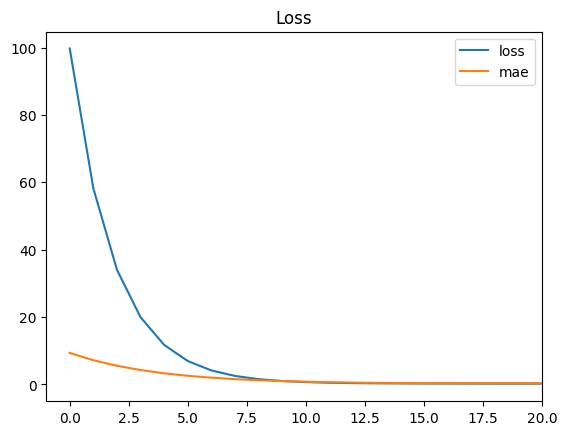

In [27]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

### 2-9 검증

In [28]:
# 검증
model.evaluate(x, y)

1/1 [==============================] - 1s 530ms/step - loss: 8.0753e-05 - mae: 0.0077


[8.075319783529267e-05, 0.007713222410529852]

### 2-10 예측

In [29]:
# 예측
model.predict([10])

1/1 [==============================] - 0s 246ms/step


array([[32.037277]], dtype=float32)

## 03 심층 신경망으로 이미지 분류

### 3-1 케라스 내장 데이터셋 로드

In [30]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [31]:
# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [32]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


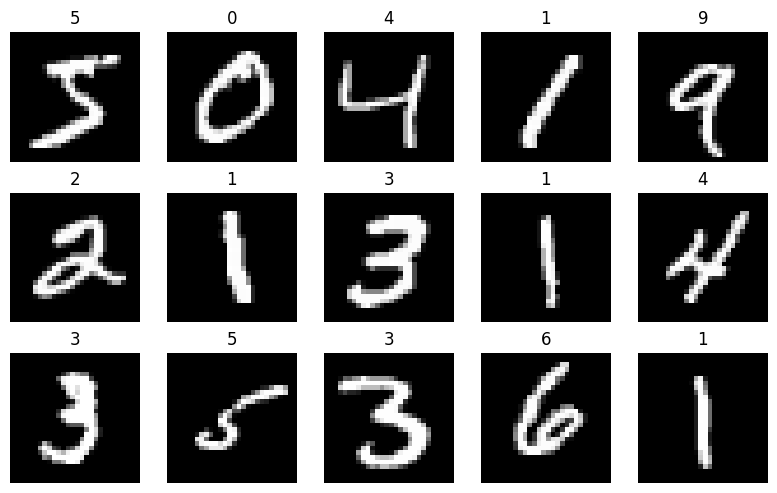

In [33]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2 데이터 전처리

In [34]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [35]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [36]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [37]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### Flatten 레이어

In [38]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [39]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4 활성화 함수

In [40]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [41]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5 입력과 출력

In [42]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [43]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

### 3-6 손실함수

In [44]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [45]:
# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

### 3-7 옵티마이저

In [46]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

### 3-8 평가지표

In [47]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [48]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9 훈련

In [49]:
# 훈련
model.fit(x_train, y_train,
          # 검증셋 지정
          validation_data=(x_test, y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2273 - accuracy: 0.9319 - val_loss: 0.1074 - val_accuracy: 0.9666
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0936 - accuracy: 0.9715 - val_loss: 0.0802 - val_accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0635 - accuracy: 0.9798 - val_loss: 0.0749 - val_accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0501 - accuracy: 0.9840 - val_loss: 0.0791 - val_accuracy: 0.9752
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0729 - val_accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0319 - accuracy: 0.9893 - val_loss: 0.0788 - val_accuracy: 0.9781
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0815 - val_ac

### 3-10 평가

In [50]:
# 검증
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0918 - accuracy: 0.9770
검증셋 정확도: 0.9769999980926514


### 3-11 예측

In [51]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [52]:
# 예측 결과 출력
predictions[0]

array([8.6793344e-13, 2.2411406e-09, 1.2504286e-10, 6.9873330e-08,
       3.3950921e-13, 5.6169110e-12, 2.3253741e-16, 9.9999791e-01,
       1.1120663e-08, 1.9363474e-06], dtype=float32)

In [53]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


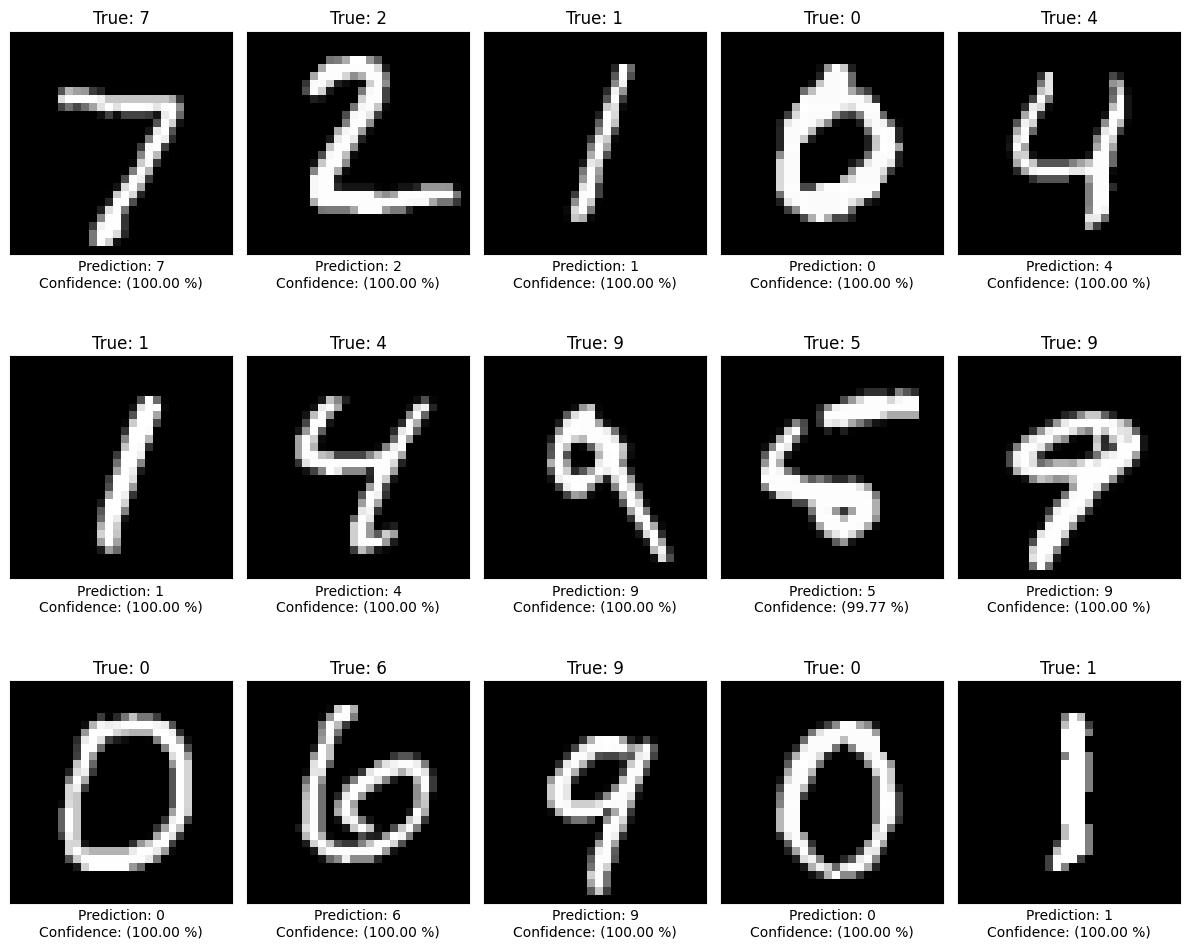

In [54]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()